In [1]:
from Bio import AlignIO
from Bio import SeqIO
import random
import sys
import argparse
import numpy as np
from difflib import SequenceMatcher

In [2]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [3]:
file_path = '../data/rna/PF00076_full_alignment.faa'
#file_path = 'data/cadherin/PF00028_full_alignment_2o72_uniprot.faa'
N = 2000
L = 491
R = 585
L = None
flag = True
#267–366
#491, 585
#output_name = args.output_path

In [4]:
seen = set()
records = []
ratios = []

def gap_ratio(seq):
    return len(seq.replace('-',''))/len(seq)

if L==None or R==None:
    flag = False
for record in SeqIO.parse(file_path, 'fasta'): 
    if flag and record[L:R].seq not in seen:
        ratios.append(gap_ratio(record[L:R].seq))
        seen.add(record[L:R].seq)
        records.append(record[L:R])
    elif not flag and record.seq not in seen:
        ratios.append(gap_ratio(record.seq))
        if gap_ratio(record.seq) >= 0:
            seen.add(record.seq)
            records.append(record)

In [5]:
len(ratios)

240258

Text(0.5, 0, 'percentage of non-gaps')

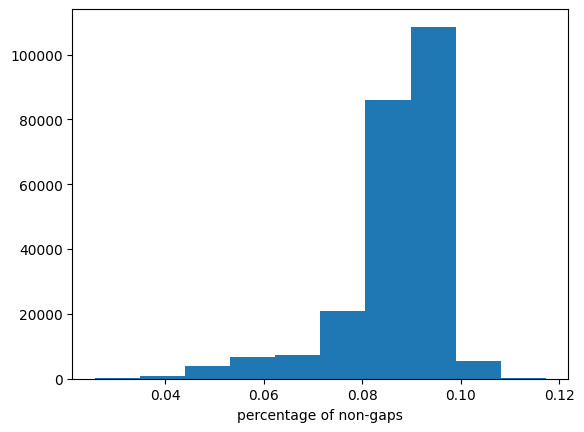

In [6]:
import matplotlib.pyplot as plt
plt.hist(ratios)
plt.xlabel('percentage of non-gaps')

In [8]:
random.shuffle(records)

In [6]:
records = records[0:N]

In [ ]:
def custom(item):
    return str(item.seq)
sorted(records, key=custom)

In [30]:
records[0:3]

[SeqRecord(seq=Seq('------------------------------------------------------...---'), id='A0A674ME89_TAKRU/132-227', name='A0A674ME89_TAKRU/132-227', description='A0A674ME89_TAKRU/132-227', dbxrefs=[]),
 SeqRecord(seq=Seq('------------------------------------------------------...---'), id='G3SSV2_LOXAF/379-470', name='G3SSV2_LOXAF/379-470', description='G3SSV2_LOXAF/379-470', dbxrefs=[]),
 SeqRecord(seq=Seq('------------------------I-------Q---------V----------T...--D'), id='A0A7L0TFL3_PODPO/1-80', name='A0A7L0TFL3_PODPO/1-80', description='A0A7L0TFL3_PODPO/1-80', dbxrefs=[])]

In [10]:
len(records)

2000

In [ ]:
flag = False
for i in range(len(records)):
    if flag:
        break
    for j in range(len(records)):
        if i != j:
            a = records[i]
            b = records[j]
            v = similar(a,b)
            if v >= 0.9:
                records.pop(i)
                flag = True
                print(v)
                break 

In [ ]:
dp = np.full((len(records),len(records)),-1,dtype=float)
for i in range(len(records)):
    for j in range(len(records)):
        # get similarity between site i and site j
        if dp[j,i] != -1:
            dp[i,j] = dp[j][i]
        elif i != j:
            a = records[i]
            b = records[j]
            v = similar(a,b)
            dp[i,j] = v
        else:
            dp[i,j] = 1

In [75]:
len(records)

119

In [40]:
csv_path = 'results/cadherin/mfdca/PF00028_8000_sequences_2o72_uniprot_mfdca.csv'
import pandas as pd
df = pd.read_csv(csv_path)

In [47]:
df['mf_dca'].mean()

0.00032672270714853005